In [1]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sn
import glob
from numpy import mean
from numpy import std
from tqdm.notebook import tqdm
import dlib
from scipy.spatial import distance
from imutils import face_utils
import statistics
import os
from mtcnn import MTCNN
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
import  imblearn
from imblearn.over_sampling import SMOTE
import pandas as pd
import researchpy as rp
import scipy.stats as stats
import matplotlib.patches as mpatches
from scipy.stats import pearsonr



In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split

In [3]:


warnings.filterwarnings('ignore')

In [105]:
detector = dlib.get_frontal_face_detector()
#detector = MTCNN()
predictor = dlib.shape_predictor("C:/Users/snakale/OneDrive - Unam/Desktop/MADS/Thesis/shape_predictor_68_face_landmarks.dat")

In [106]:
def calculate_EAR(eye):
	A = distance.euclidean(eye[1], eye[5])
	B = distance.euclidean(eye[2], eye[4])
	C = distance.euclidean(eye[0], eye[3])
	ear_aspect_ratio = (A+B)/(2.0*C)
	return ear_aspect_ratio

In [107]:
def mouth_aspect_ratio(mouth):
	# compute the euclidean distances between the two sets of
	# vertical mouth landmarks (x, y)-coordinates
	D = distance.euclidean(mouth[2], mouth[10]) # 51, 59
	E = distance.euclidean(mouth[4], mouth[8]) # 53, 57

	# compute the euclidean distance between the horizontal
	# mouth landmark (x, y)-coordinates
	F = distance.euclidean(mouth[0], mouth[6]) # 49, 55
	G = distance.euclidean(mouth[1], mouth[11]) # 50, 60
	H = distance.euclidean(mouth[3], mouth[9]) # 52, 58
	I = distance.euclidean(mouth[5], mouth[7]) # 54, 56

	# compute the mouth aspect ratio
	mar = (D + E + G + H + I) / (5.0 * F)

	# return the mouth aspect ratio
	return mar

In [108]:
def process_video(input_file):
    

    EAR_list = []
    
    COUNTER_list = []
    
    _COUNTER_list = []
    
    COUNTER = 0
    blinks = 0
    

    while True:
        _, frame = input_file.read()
        if _ == False:
            break
        #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        faces = detector(img)                   #change to detector only
   
        for face in faces:
            face_landmarks = predictor(img, face)
        

            
            landmark_list = predictor(img, face)
            

            leftEye = []
            rightEye = []

            for n in range(36,42):
                x = face_landmarks.part(n).x
                y = face_landmarks.part(n).y
                leftEye.append((x,y))
                next_point = n+1
                if n == 41:
                    next_point = 36
                x2 = face_landmarks.part(next_point).x
                y2 = face_landmarks.part(next_point).y
                cv2.line(frame,(x,y),(x2,y2),(0,255,0),1)

            for n in range(42,48):
                x = face_landmarks.part(n).x
                y = face_landmarks.part(n).y
                rightEye.append((x,y))
                next_point = n+1
                if n == 47:
                    next_point = 42
                x2 = face_landmarks.part(next_point).x
                y2 = face_landmarks.part(next_point).y
                cv2.line(frame,(x,y),(x2,y2),(0,255,0),1)

            left_ear = calculate_EAR(leftEye)
            right_ear = calculate_EAR(rightEye)

            EAR = (left_ear+right_ear)/2
            EAR_ = round(EAR,2)
            
            EAR_list.append(EAR_)
            
            
                 

            
            if EAR_ < 0.2:
                    COUNTER += 1
                    if COUNTER >= 3:
                                blinks += 1

            else:
                              # reset the eye frame counter

                    
                    #if COUNTER >= 3:
                                #blinks += 1
            
            #COUNTER_list.append(blinks)                
                                                          # reset the eye frame counter
                    COUNTER = 0
                    
            COUNTER_list.append(blinks)
            
            _COUNTER_list.append(COUNTER)
            

       

        
        
        key = cv2.waitKey(1)
        if key == 27:
            break
    #else:
        #break
    input_file.release()
    cv2.destroyAllWindows()

     
    return [EAR_list, COUNTER_list, _COUNTER_list]

In [109]:
def process_video_(input_file):

      
    cnt = 0
    yawns = 0

    MAR_list = []
    
    CNT_list = []
      

    

    while True:
        _, frame = input_file.read()
        if _ == False:
            break
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        faces = detector(gray)             #detector only
   
        for face in faces:
            face_landmarks = predictor(gray, face)
        

            
            #landmark_list = dlib_facelandmark(gray, face)
            



            
            face_landmarks = face_utils.shape_to_np(face_landmarks)
            
            (mStart, mEnd) = (48, 67)


            mouth = face_landmarks[mStart:mEnd]
            mar = mouth_aspect_ratio(mouth)
            
            
            
            MAR_list.append(mar)
            
            


             
     
          
        
        
            if mar > 0.6:
                    cnt += 1
                    if cnt == 20:
                                yawns = 1
                    else:
                                yawns = 0

            else:
  
    
    
                    cnt = 0
                    

            
            CNT_list.append(cnt)    
                 

        
        
        key = cv2.waitKey(1)
        if key == 27:
            break
    #else:
        #break
    input_file.release()
    cv2.destroyAllWindows()

     
    return [MAR_list, CNT_list]
    

In [110]:
dir_path = 'C:/Users/snakale/OneDrive - Unam/Desktop/MADS/Thesis/YawDD/ALL/*.avi'
filenames = glob.glob(dir_path)

In [111]:
BF = []

PERCLOS = []

AVERAGE_EAR = []

rrr_results = []

rr_results = []

r_state = []

rr_state = []

rrr_state = []

Number_frames_l = []

Max_Run_EAR = []                                     #new

ppp=len(filenames)

for k in range(0,ppp):

    input_file = cv2.VideoCapture(filenames[k])
    Number_Frames = input_file.get(cv2.CAP_PROP_FRAME_COUNT)
    Number_frames_l.append(Number_Frames)
    EVENT_ID = os.path.splitext(os.path.basename(filenames [k]))[0]
    
    rrr_results.append(EVENT_ID)
    
    ert = filenames [k]
    zz= EVENT_ID.rsplit("-")[3]
    
    zzz = EVENT_ID.rsplit("-")[2]
    
    zzzz = EVENT_ID.rsplit("-")[1]
    
    r_state.append(zz)
    
    rr_state.append(zzz)
    
    rrr_state.append(zzzz)
    
    fps = input_file.get(cv2.CAP_PROP_FPS)
    duration = (Number_Frames // fps)/60     #in minutes
    
    
    EAR_list = process_video(input_file)
    
   
    EAR_signal = np.asarray(EAR_list[0])
   
    MEAN_EAR = np.mean(EAR_signal) 
    
    AVERAGE_EAR.append(MEAN_EAR)
    
    COUNTER_ = np.asarray(EAR_list[1])
    
    #Blink_count = int(max(COUNTER_, default=0)/duration)

    Facial_frames_extracted = len(EAR_signal)
    
    rr_results.append(Facial_frames_extracted)
    
    _COUNTER_ = np.asarray(EAR_list[2])
    
    perclos_ =  (sum(_COUNTER_ > 0)/(Facial_frames_extracted+0.01))*100
    
    PERCLOS.append(perclos_)
    
    #new start
   
    def largest(arr, n):
 
    # Initialize maximum element
        max = 0
 
    # Traverse array elements from second
    # and compare every element with
    # current max
        for i in range(1, n):
            if arr[i] > max:
                max = arr[i]
        return max
 
 
    # Driver Code
    arr = _COUNTER_
    n = len(arr)
    Ans = largest(arr, n)
                  
   
    Max_Run_EAR.append(Ans)
    
    # new end
    
    
    
    
    def maxPositiveRun_(pst):
        maxVal_ = 0            
        score_array_ = []
        for nt in pst:
            if nt > 0:
                maxVal_ +=1
            else:
            
                if(maxVal_>0):
                    score_array_.append(maxVal_)
                maxVal_ = 0
    
        if(maxVal_>0):
            score_array_.append(maxVal_)
    
        return score_array_

    ll = maxPositiveRun_(_COUNTER_)

    Frames_ = 10   #frames to define a blink  one blink lasts for 0.33 seconds, 30 fps by 0.33 = 10

    result_ = [xx//Frames_ for xx in ll]

    Blink_frequency = sum(result_)
    

    BF.append(Blink_frequency)
    
    #print (EAR_signal)


In [112]:
#print(COUNTER_)

In [113]:
#abb = max(COUNTER_)


In [114]:
#print(_COUNTER_)

In [115]:
#abbv = max(_COUNTER_)


In [116]:
k_results = []

YF = []

FPS = []

PMO = []

AVERAGE_MAR = []

Max_Run_MAR = []                          #new


for kk in range(0,ppp):
    #input_file = cv2.VideoCapture(filenames[kk])
    
    input_file = cv2.VideoCapture(filenames[kk])
    Number_Frames = input_file.get(cv2.CAP_PROP_FRAME_COUNT)
    Number_frames_l.append(Number_Frames)

    
    fps = round(input_file.get(cv2.CAP_PROP_FPS),0)
    FPS.append(fps)
    durationInSeconds = Number_Frames // fps

    MAR_list  = process_video_(input_file)
        
    MAR_signal = np.asarray(MAR_list[0])
  
    MEAN_MAR = np.mean(MAR_signal) 
    
    AVERAGE_MAR.append(MEAN_MAR)
    

    k_results.append(MEAN_MAR)
    
    
    

    

   
    _CNTR_1 = np.asarray(MAR_list[1])
    
    mar =  (sum(_CNTR_1 > 0)/(Facial_frames_extracted+0.01))*100
    
    PMO.append(mar)
    
    
  
    
       #new start

    
    def largest2(arr2, n2):
 
    # Initialize maximum element
        max = 0
 
    # Traverse array elements from second
    # and compare every element with
    # current max
        for iii in range(1, n2):
            if arr2[iii] > max:
                max = arr2[iii]
        return max
 
 
    # Driver Code
    arr2 = _CNTR_1
    n2 = len(arr2)
    Ans2 = largest2(arr2, n2)
                  
    
    Max_Run_MAR.append(Ans2)
    
    
    
    
    
    
    # new end

    
    
    def maxPositiveRun(lst):
        maxVal = 0            
        score_array = []
        for n in lst:
            if n > 0:
                maxVal +=1
            else:
            
                if(maxVal>0):
                    score_array.append(maxVal)
                maxVal = 0
    
        if(maxVal>0):
            score_array.append(maxVal)
    
        return score_array

    l = maxPositiveRun(_CNTR_1)

    Frames = 60   #frames to define a yawn; a yawn lasts for about 2 to 6 seconds 2*30 = 60

    result = [x//Frames for x in l]

    Yawn_frequency = sum(result)
    
    
    
    
    

    YF.append(Yawn_frequency)
    


    #print (Max_Run_MOR)
    #print (Max_Run_MAR)
    
    #print(_MOR_)
    

In [117]:
#print (MAR_signal)

In [118]:
#print(_CNTR_)

In [119]:
df1 = pd.DataFrame(data=BF)

df2= pd.DataFrame(data=YF)

df3 = pd.DataFrame(data=rrr_results)

df4 =pd.DataFrame(data= r_state)

df5 =pd.DataFrame(data= rr_state)

df6 =pd.DataFrame(data= rrr_state)

df7 = pd.DataFrame(data=PERCLOS)

df8 = pd.DataFrame(data=FPS)

df9 = pd.DataFrame(data=rr_results)

df10 = pd.DataFrame(data=Max_Run_EAR)

df11 = pd.DataFrame(data=Max_Run_MAR)

df12 = pd.DataFrame(data=PMO)

Fatigue_det = pd.concat([df3, df4, df5, df6, df1, df7, df2, df12, df10,  df11, df9, df8], axis=1)

Fatigue_det.columns = ['EventID', 'State', 'Condition', 'Gender', 'Blink_Frequency', 'PERCLOS', 'Yawn_Frequency', 'PMO', 'Max_Run_EAR', 'Max_Run_MAR', 'FACIAL_FRAMES', 'FPS']
Fatigue_det

,EventID,State,Condition,Gender,Blink_Frequency,PERCLOS,Yawn_Frequency,PMO,Max_Run_EAR,Max_Run_MAR,FACIAL_FRAMES,FPS
0,1-Female-NoGlasses-Normal,Normal,NoGlasses,Female,0,0.000000,0,0.465095,0,1,416,30.0
1,1-Female-NoGlasses-Talking,Talking,NoGlasses,Female,0,5.892752,0,4.185852,8,6,560,30.0
2,1-Female-NoGlasses-Yawning,Yawning,NoGlasses,Female,0,0.775174,0,36.742477,2,43,387,30.0
3,1-Male-NoGlasses-Talking,Talking,NoGlasses,Male,0,6.003065,0,0.000000,6,0,633,30.0
4,1-Male-NoGlasses-Yawning,Yawning,NoGlasses,Male,0,0.000000,0,19.068881,0,18,434,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...
202,9-Female-NoGlasses-Talking,Talking,NoGlasses,Female,1,7.233411,0,7.441514,10,5,788,30.0
203,9-Female-NoGlasses-Yawning,Yawning,NoGlasses,Female,0,0.000000,0,13.487745,0,12,376,30.0
204,9-Male-NoGlasses-Normal,Normal,NoGlasses,Male,0,0.000000,0,0.000000,0,0,180,30.0
205,9-Male-NoGlasses-Talking,Talking,NoGlasses,Male,0,3.431204,0,0.000000,5,0,204,30.0


In [120]:
Fatigue_det.describe()

,Blink_Frequency,PERCLOS,Yawn_Frequency,PMO,Max_Run_EAR,Max_Run_MAR,FACIAL_FRAMES,FPS
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.0
mean,0.777778,5.928742,0.024155,6.410218,7.816425,6.710145,470.985507,30.0
std,2.533061,9.623138,0.182741,12.846288,16.282551,16.531906,220.881189,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.0
25%,0.000000,0.536210,0.000000,0.000000,1.000000,0.000000,345.500000,30.0
50%,0.000000,2.276997,0.000000,0.000000,4.000000,0.000000,499.000000,30.0
75%,0.000000,6.452992,0.000000,7.441514,7.000000,6.000000,629.500000,30.0
max,19.000000,68.228584,2.000000,82.321752,192.000000,153.000000,1086.000000,30.0


In [121]:
Fatigue_det.to_csv('Yaw_DD.csv',index=False)

Data

In [4]:
#DEAL WITH THE TALKING CLASS!!!!

df_1a= pd.read_csv("Yaw_DD.csv")
df_11a = df_1a.dropna()



MERGE NORMAL AND TALKING INTO ONE CLASS i.e. NON_YAWNING

In [5]:
def merge_normal_talking(b):
    if ((b['State'] == 'Normal') ) or ((b['State'] == 'Talking' )):    
        return 'Non_Yawning'                                             
    else:
        return 'Yawning'
    
b = df_11a
df_11a['State_'] = df_11a.apply(merge_normal_talking, axis=1)

#print (df_11a)


INITIAL DATA LABELLING

In [6]:
y = df_11a['State_']

le = LabelEncoder()

df_11a['State_'] = le.fit_transform(df_11a['State_'])

y = le.transform(y)

DEFINING THE PREDICTOR FEATURE SPACE

In [7]:

X_ = df_11a[['PERCLOS' , 'PMO']]



     Scaling predictors

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X_)


THRESHOLDING AND DATA LABELLING

In [9]:
#define/ set threshold values of 10% for both PERCLOS and PMO
MO = 10
EO = 10

In [10]:
def conditions(s):
    if ((s['PERCLOS'] > EO) ) or ((s['PMO'] > MO )):     # check for all parameters
        return 'Yawning'                                             # fatigue = 1 not fatigue = 0
    else:
        return 'Non_Yawning'

In [11]:
s = df_11a
df_11a['Thresholding_Class'] = df_11a.apply(conditions, axis=1)
df_11a['Thresholding_Class'] =  le.fit_transform(df_11a['Thresholding_Class'])

#print (df_11a)


In [12]:
def final_label(lb):
    if ((lb['Thresholding_Class']==1)) and (( lb['State_']==0)):     
        return lb['State_']                                            
    else:
        return lb['Thresholding_Class']

lb = df_11a
df_11a['Fatigue_State'] = df_11a.apply(final_label, axis=1)
#print(df_11a)

EXTRACTING SUBSETS OF THE DATASET

In [13]:
df_glasses = df_11a[df_11a.Condition == 'Glasses']
df_noglasses = df_11a[df_11a.Condition == 'NoGlasses']
df_sunglasses = df_11a[df_11a.Condition == 'SunGlasses']
df_male = df_11a[df_11a.Gender == 'Male']
df_female = df_11a[df_11a.Gender == 'Female']

X_glasses = df_glasses[['PERCLOS' , 'PMO']]
X_noglasses = df_noglasses[['PERCLOS' , 'PMO']]
X_sunglasses = df_sunglasses[['PERCLOS' , 'PMO']]
X_male = df_male[['PERCLOS' , 'PMO']]
X_female = df_female[['PERCLOS' , 'PMO']]

Xglasses = scaler.fit_transform(X_glasses)
Xnoglasses = scaler.fit_transform(X_noglasses)
Xsunglasses = scaler.fit_transform(X_sunglasses)
Xmale = scaler.fit_transform(X_male)
Xfemale = scaler.fit_transform(X_female)


y_noglasses = df_noglasses['Fatigue_State']
y_glasses = df_glasses['Fatigue_State']
y_sunglasses = df_sunglasses['Fatigue_State']
y_male = df_male['Fatigue_State']
y_female = df_female['Fatigue_State']


CHECKING CLASS IMBALANCE

0    152
1     55
Name: Fatigue_State, dtype: int64


Text(0.5, 0, 'Target label')

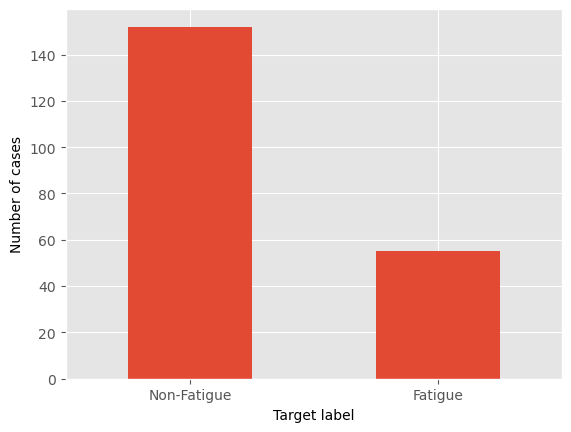

In [27]:
class_fre = df_11a['Fatigue_State'].value_counts()
#print(class_fre)
df_11a['Fatigue_State'].value_counts().plot(kind='bar')
plt.xticks([0, 1], ['Non-Fatigue', 'Fatigue'], rotation = 'horizontal')
plt.ylabel("Number of cases")
plt.xlabel("Target label")



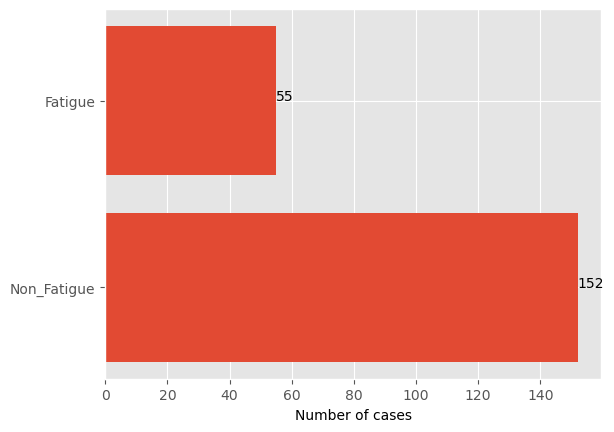

In [38]:
from matplotlib import style
Fatigue_cases = {'Non_Fatigue':152 , 'Fatigue':55}
xa1 = list(Fatigue_cases.keys())
xa2 = list(Fatigue_cases.values())
style.use('ggplot')
plt.barh(xa1, xa2)
plt.xlabel('Number of cases')
for index, value in enumerate(xa2):
    plt.text(value, index, str(value))
plt.show()



DEALING WITH CLASS IMBALANCE

     SMOTE

In [48]:

smote = SMOTE (random_state = 42)
x_s, y_s = smote.fit_resample(X, df_11a['Fatigue_State'])






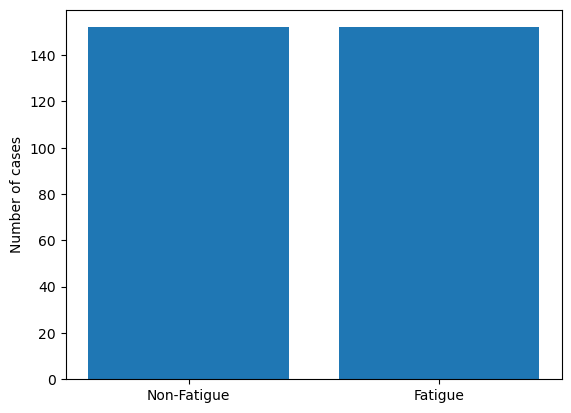

In [27]:
unique, counts = np.unique(y_s, return_counts=True)
plt.bar(unique, counts)
plt.xticks([0, 1], ['Non-Fatigue', 'Fatigue'], rotation = 'horizontal')
plt.ylabel('Number of cases')
#plt.title('Target class')
plt.show()

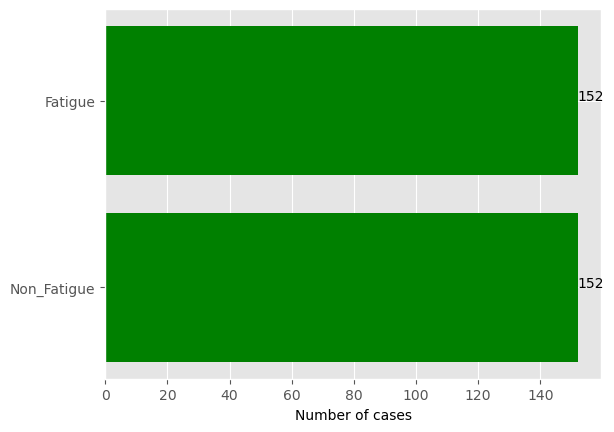

In [45]:
Fatigue_cases_1 = {'Non_Fatigue':152 , 'Fatigue':152}
xa11 = list(Fatigue_cases_1.keys())
xa12 = list(Fatigue_cases_1.values())
style.use('ggplot')
plt.barh(xa11, xa12, color='green')
plt.xlabel('Number of cases')
for index, value in enumerate(xa12):
    plt.text(value, index, str(value))
plt.show()


     OVERSAMPLER

In [165]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 42)
x_ros, y_ros = ros.fit_resample(X, df_11a['Fatigue_State'])

In [72]:
#print (x_ros)

STATISTICAL ANALYSIS OF THE FEATURES

In [166]:
pip install researchpy

In [167]:
import pandas as pd
import researchpy as rp
import scipy.stats as stats

Checking for normality assumption

In [168]:
#Checking assumptions of normality
shapiro1 = stats.shapiro(df_11a['PERCLOS'])
shapiro2 = stats.shapiro(df_11a['PMO'])



print('Normality PERCLOS:', shapiro1)
print('Normality PMO:', shapiro2)



Normality PERCLOS: ShapiroResult(statistic=0.613569974899292, pvalue=2.391667331245811e-21)
Normality PMO: ShapiroResult(statistic=0.5688132047653198, pvalue=2.0936429009083174e-22)


T-TESTS OF INDEPENDENCE TO GET THE MEANS

In [169]:
summary1, results1 = rp.ttest(group1= df_11a['PERCLOS'][df_11a['Fatigue_State'] == 0], group1_name= "0",
                            group2= df_11a['PERCLOS'][df_11a['Fatigue_State'] == 1], group2_name= 1)
print(summary1)
print (results1)

   Variable      N       Mean         SD        SE  95% Conf.   Interval
0         0  152.0   4.028924   6.480538  0.525641   2.990363   5.067485
1         1   55.0  11.179150  14.056893  1.895431   7.379039  14.979260
2  combined  207.0   5.928742   9.623138  0.668854   4.610065   7.247420
          Independent t-test   results
0      Difference (0 - 1) =    -7.1502
1      Degrees of freedom =   205.0000
2                       t =    -4.9882
3   Two side test p value =     0.0000
4  Difference < 0 p value =     0.0000
5  Difference > 0 p value =     1.0000
6               Cohen's d =    -0.7849
7               Hedge's g =    -0.7820
8          Glass's delta1 =    -1.1033
9        Point-Biserial r =    -0.3290


In [170]:
summary2, results2 = rp.ttest(group1= df_11a['PMO'][df_11a['Fatigue_State'] == 0], group1_name= "0",
                            group2= df_11a['PMO'][df_11a['Fatigue_State'] == 1], group2_name= 1)
print(summary2)
print (results2)

   Variable      N       Mean         SD        SE  95% Conf.   Interval
0         0  152.0   1.220873   2.835288  0.229972   0.766495   1.675252
1         1   55.0  20.751678  17.938271  2.418796  15.902283  25.601072
2  combined  207.0   6.410218  12.846288  0.892879   4.649865   8.170570
          Independent t-test   results
0      Difference (0 - 1) =   -19.5308
1      Degrees of freedom =   205.0000
2                       t =   -13.0339
3   Two side test p value =     0.0000
4  Difference < 0 p value =     0.0000
5  Difference > 0 p value =     1.0000
6               Cohen's d =    -2.0510
7               Hedge's g =    -2.0434
8          Glass's delta1 =    -6.8885
9        Point-Biserial r =    -0.6732


In [172]:
def clas(kq):
    if ((kq['Fatigue_State'] == 1) ) :    
        return 'Yawning'                                             
    else:
        return 'Non_Yawning'

kq = df_11a
df_11a['Fatigue_State_'] = df_11a.apply(clas, axis=1)

Mann-Whitney U Test

In [173]:
stats.mannwhitneyu(x=df_11a['PERCLOS'][df_11a['Fatigue_State_'] == 'Non_Yawning'], y=df_11a['PERCLOS'][df_11a['Fatigue_State_'] == 'Yawning'], alternative = 'two-sided')

MannwhitneyuResult(statistic=2396.5, pvalue=2.6869373610080425e-06)

In [174]:
stats.mannwhitneyu(x=df_11a['PMO'][df_11a['Fatigue_State_'] == 'Non_Yawning'], y=df_11a['PMO'][df_11a['Fatigue_State_'] == 'Yawning'], alternative = 'two-sided')

MannwhitneyuResult(statistic=723.5, pvalue=2.0576823435947178e-22)

CORRELATION ANALYSIS

In [175]:
df_corr = df_11a[['Fatigue_State', 'PERCLOS', 'PMO']]

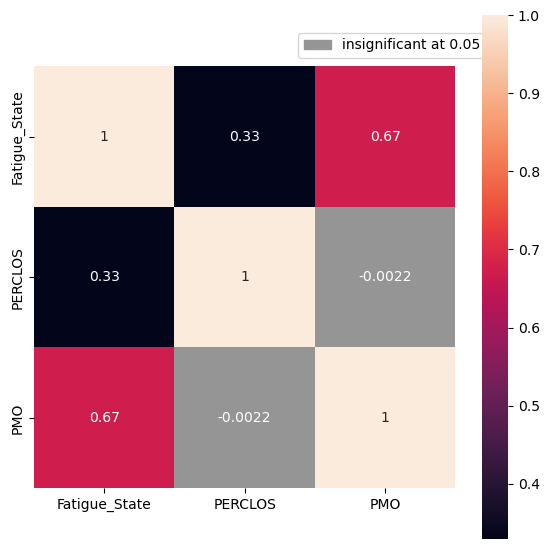

In [180]:
import matplotlib.patches as mpatches
from scipy.stats import pearsonr

pvals = df_corr.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*df_corr.corr().shape)

psig = 0.05

plt.figure(figsize=(6.8,6.8))

sns.heatmap(df_corr.corr()[pvals<psig], annot=True, square=True)


sns.heatmap(df_corr.corr()[pvals>=psig], annot=True, square=True, cbar=False, 
            cmap=sns.color_palette("Greys", n_colors=1, desat=1))

colors = [sns.color_palette("Greys", n_colors=1, desat=1)[0]]
texts = [f"insignificant at {psig}"]
patches = [ mpatches.Patch(color=colors[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
plt.legend(handles=patches, bbox_to_anchor=(.85, 1.05), loc='center')

GRID SEARCH AND HYPER PARAMETER TUNING

    SVM

In [183]:

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
grid.fit(x_s, y_s)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)




The best parameters are {'C': 10.0, 'gamma': 1.0} with a score of 0.92


      DT

In [184]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=cv, verbose=True)
grid_search.fit(x_s, y_s)

final_model = grid_search.best_estimator_
final_model



Fitting 5 folds for each of 90 candidates, totalling 450 fits


DecisionTreeClassifier(ccp_alpha=0.001, max_depth=9, max_features='auto',
                       random_state=42)

       KNN

In [194]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid, cv=cv, scoring='accuracy', return_train_score=False)
grid_knn.fit(x_s, y_s)

final_model_knn = grid_knn.best_estimator_
final_model_knn

KNeighborsClassifier(n_neighbors=7)

    LR

In [186]:
grid_LR={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid_LR,cv=cv)
logreg_cv.fit(x_s,y_s)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.9016393442622951


      k-Means

In [187]:
# Define the parameter grid
param_grid1 = {
    'n_clusters': [2],
    'init': ['k-means++', 'random'],
    'n_init': [5, 10, 15],
    'max_iter': [100, 200, 300, 400, 500],
    'tol': [0.0001, 0.001, 0.01],
    'algorithm': ['auto', 'full', 'elkan'],
    'random_state': [0, 42, 100]
}

# Create the KMeans object
kmeans = KMeans(random_state=42)

# Perform grid search
grid_search = GridSearchCV(kmeans, param_grid=param_grid1, cv=cv, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_s,y_s)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)
print('Optimal number of clusters based on parameter grid: ' + str(grid_search.best_params_['n_clusters']))

Best hyperparameters:  {'algorithm': 'auto', 'init': 'k-means++', 'max_iter': 100, 'n_clusters': 2, 'n_init': 5, 'random_state': 42, 'tol': 0.01}
Optimal number of clusters based on parameter grid: 2


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
wcss = []
range_n_clusters = range(2, 11)
for i in range_n_clusters:
    kmeans = KMeans(n_clusters = i, 
                init=grid_search.best_params_['init'], 
                max_iter=grid_search.best_params_['max_iter'], 
                tol=grid_search.best_params_['tol'], 
                algorithm=grid_search.best_params_['algorithm'], 
                random_state=42
                )
    kmeans.fit(x_s)
    wcss.append(kmeans.inertia_)
    
    cluster_labels = kmeans.fit_predict(x_s)
    silhouette_avg = silhouette_score(x_s, cluster_labels)
    
    print(f'For n_clusters = {i}, the average silhouette score is : {round(silhouette_avg, 2)}')
    
plt.plot(range(2, 11), wcss, marker = 'o', linestyle = '--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Add a vertical line indicating the number of clusters
n_clusters_g = grid_search.best_params_['n_clusters']
plt.axvline(x=n_clusters_g, linestyle='--', color='red', label=f'Number of Clusters: {n_clusters_g}')
plt.annotate(f'Optimal Number of Clusters: {n_clusters_g}', xy=(n_clusters_g, wcss[n_clusters_g-2]), xytext=(n_clusters_g-1, wcss[n_clusters_g-2]+5000),
            arrowprops=dict(arrowstyle='->',lw=1, color='red'), fontsize=12)
plt.legend()
plt.show()

     GNB

In [189]:
parameters_gnb = {
  'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}
cv_model = GridSearchCV(estimator=GaussianNB(), param_grid=parameters_gnb, cv=cv, verbose=1, scoring='accuracy')
cv_model.fit(x_s, y_s)
cv_model.best_params_

Fitting 5 folds for each of 14 candidates, totalling 70 fits


{'var_smoothing': 0.01}

    RF

In [190]:
param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}



CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= cv)
CV_rfc.fit(x_s, y_s)

CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 100}

      XBG

In [192]:
estimator_xgb = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

parameters_xgb = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}


grid_search_xgb = GridSearchCV(
    estimator=estimator_xgb,
    param_grid=parameters_xgb,
    scoring = 'accuracy',
    n_jobs = 10,
    cv = cv,
    verbose=True
)

grid_search_xgb.fit(x_s, y_s)

grid_search_xgb.best_estimator_



Fitting 5 folds for each of 96 candidates, totalling 480 fits


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=140, n_jobs=None, nthread=4,
              num_parallel_tree=None, ...)

DEFINE THE CLASSIFIERS

In [46]:
def get_classifiers():
    
    classifiers = dict()

    classifiers['RF']=RandomForestClassifier(criterion = 'gini', max_depth = 6, max_features = 'auto', n_estimators = 100, random_state=42)
    #classifiers['XGB']=XGBClassifier(enable_categorical= 'False', learning_rate=0.1, max_depth=4, n_estimators=140, nthread=4, random_state=42)
    classifiers['SVM']=SVC(kernel= 'rbf', C = 10.0, gamma = 1, random_state=42)
    
    classifiers['KNN']=KNeighborsClassifier(n_neighbors=7)
    classifiers['DT']=DecisionTreeClassifier(ccp_alpha=0.001, max_depth=9, max_features='auto', random_state=42)
    classifiers['LR']=LogisticRegression(C = 0.1, penalty = 'l2', random_state=42)

    classifiers['GNB']=GaussianNB(var_smoothing = 0.01)
    classifiers['k-Means']= KMeans(n_clusters=2, random_state=42, algorithm = 'auto', init = 'k-means++', max_iter = 100, n_init = 5, tol = 0.01)

    
    return classifiers

CROSS VALIDATION

In [49]:
#UNBALANCED DATASET
#x = X
#y = df_11a['Fatigue_State']

#BALANCED DATASET
x = x_s
y = y_s


In [50]:
from sklearn import metrics


def evaluate_model(model, x, y):
    cv=StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    scores=cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

def evaluate_model1(model, x, y):
    cv=StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    scores1=cross_val_score(model, x, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
    return scores1

def evaluate_model2(model, x, y):
    cv=StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    scores2=cross_val_score(model, x, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
    return scores2

def evaluate_model3(model, x, y):
    cv=StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    scores3=cross_val_score(model, x, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
    return scores3

def evaluate_model4(model, x, y):
    cv=StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    scores4=cross_val_score(model, x, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
    return scores4

RUNNING THE MODELS

In [51]:
from numpy import mean
from numpy import std
classifiers = get_classifiers()

results, results1, results2, results3, results4, names = list(), list(), list(), list(), list(), list()

for name, model in classifiers.items():
    scores=evaluate_model(model, x, y)
    scores1=evaluate_model1(model, x, y)
    scores2=evaluate_model2(model, x, y)
    scores3=evaluate_model3(model, x, y)
    #scores4=evaluate_model4(model, x, y)
    #scores=evaluate_model(model, X, y)
    results.append(scores*100)
    results1.append(scores1*100)
    results2.append(scores2*100)
    results3.append(scores3*100)
    #results4.append(scores4*100)
    names.append(name)
    #print ('>%s %.3f (%.3f) %.3f %.3f %.3f %.3f' %(name, mean(scores), std(scores), mean(scores1), mean(scores2), mean(scores3), mean(scores4)))
    print ('>%s %.3f (%.3f) %.3f %.3f %.3f' %(name, mean(scores), std(scores), mean(scores1), mean(scores2), mean(scores3)))

>RF 0.938 (0.030) 0.940 0.974 0.909
>SVM 0.921 (0.028) 0.925 0.974 0.885
>KNN 0.915 (0.033) 0.918 0.960 0.883
>DT 0.911 (0.046) 0.912 0.921 0.904
>LR 0.902 (0.027) 0.898 0.874 0.925
>GNB 0.898 (0.030) 0.895 0.881 0.914
>k-Means 0.479 (0.237) 0.536 0.556 0.615


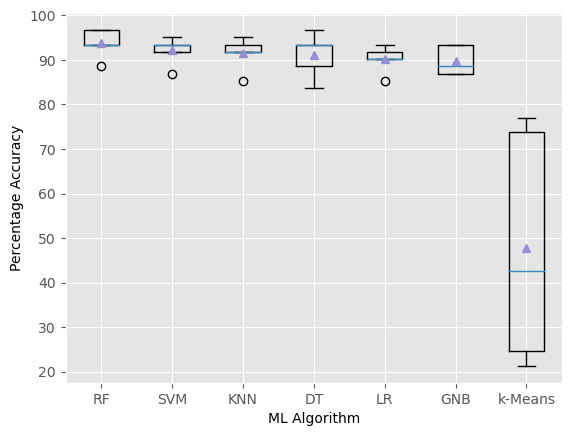

In [52]:
from matplotlib import pyplot
pyplot.boxplot(results, labels=names, showmeans = True)
plt.xticks(rotation='horizontal')
#plt.title('Average Model Accuracy')
plt.xlabel('ML Algorithm') 
plt.ylabel('Percentage Accuracy') 
pyplot.show()

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [54]:
SV_Model=SVC(kernel= 'rbf', C = 10.0, gamma = 1, random_state=42, probability = True)
SV_Model.fit(X_train, Y_train)

XGB_Model = XGBClassifier(enable_categorical= 'False', learning_rate=0.1, max_depth=4, n_estimators=140, nthread=4, random_state=42)
XGB_Model.fit(X_train, Y_train)

RF_Model=RandomForestClassifier(criterion = 'gini', max_depth = 6, max_features = 'auto', n_estimators = 100, random_state=42)
RF_Model.fit(X_train, Y_train)



SVM_Class=SV_Model.predict(X_test)
accuracy1 = metrics.accuracy_score(Y_test, SVM_Class)

XGB_Class=XGB_Model.predict(X_test)
accuracy2 = metrics.accuracy_score(Y_test, XGB_Class)

RF_Class=RF_Model.predict(X_test)
accuracy3 = metrics.accuracy_score(Y_test, RF_Class)



print (accuracy1, accuracy2, accuracy3)




0.9016393442622951 0.9672131147540983 0.9836065573770492


CONFUSION MATRIX FOR THE BEST 4 CLASSIFIERS

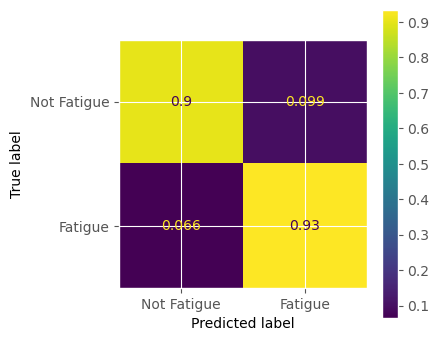

In [55]:
from sklearn.model_selection import cross_val_predict
SV_Model=SVC(kernel= 'rbf', C = 10.0, gamma = 1, random_state=42, probability = True)

SVM_pred=cross_val_predict(SV_Model, x, y, cv=5)
confusion_matrix = metrics.confusion_matrix(y, SVM_pred)


confusion_matrix1 = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(4, 4))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1, display_labels = ['Not Fatigue', 'Fatigue'])

cm_display.plot(ax=ax)


plt.show()


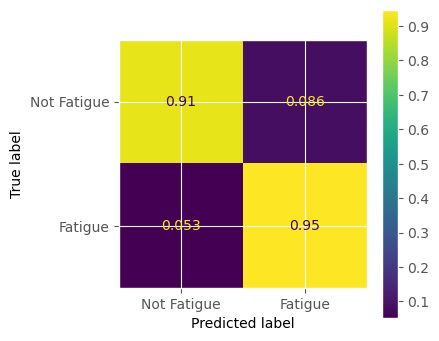

In [65]:

XGB_Model = XGBClassifier(enable_categorical= 'False', learning_rate=0.1, max_depth=4, n_estimators=140, nthread=4, random_state=42)

XGB_pred=cross_val_predict(XGB_Model, x, y, cv=5)
confusion_matrix1 = metrics.confusion_matrix(y, XGB_pred)


confusion_matrix_1 = confusion_matrix1.astype('float') / confusion_matrix1.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(4, 4))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_1, display_labels = ['Not Fatigue', 'Fatigue'])

cm_display.plot(ax=ax)


plt.show()





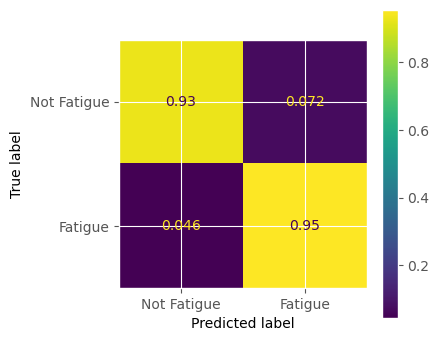

In [57]:
RF_Model=RandomForestClassifier(criterion = 'gini', max_depth = 6, max_features = 'auto', n_estimators = 100, random_state=42)
RF_pred=cross_val_predict(RF_Model, x, y, cv=5)
confusion_matrix2 = metrics.confusion_matrix(y, RF_pred)


confusion_matrix_2 = confusion_matrix2.astype('float') / confusion_matrix2.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(4, 4))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_2, display_labels = ['Not Fatigue', 'Fatigue'])

cm_display.plot(ax=ax)


plt.show()




CHECKING PERFOMANCES UNDER DIFFERENT CONDITIONS i.e. Glasses , NoGlasses , SunGlasses

      NOGLASSES

In [219]:
SVM_Class_1=SV_Model.predict(Xnoglasses)
SVM_acc1 = metrics.accuracy_score(y_noglasses, SVM_Class_1)

XGB_Class_1=XGB_Model.predict(Xnoglasses)
XGB_acc1 = metrics.accuracy_score(y_noglasses, XGB_Class_1)

RF_Class_1=RF_Model.predict(Xnoglasses)
RF_acc1 = metrics.accuracy_score(y_noglasses, RF_Class_1)

print (SVM_acc1, XGB_acc1, RF_acc1)

0.9145299145299145 0.9401709401709402 0.9401709401709402


         GLASSES

In [220]:
SVM_Class_2=SV_Model.predict(Xglasses)
SVM_acc2 = metrics.accuracy_score(y_glasses, SVM_Class_2)

XGB_Class_2=XGB_Model.predict(Xglasses)
XGB_acc2 = metrics.accuracy_score(y_glasses, XGB_Class_2)

RF_Class_2=RF_Model.predict(Xglasses)
RF_acc2 = metrics.accuracy_score(y_glasses, RF_Class_2)

print (SVM_acc2, XGB_acc2, RF_acc2)

0.8823529411764706 0.8823529411764706 0.8676470588235294


       SUNGLASSES

In [221]:
SVM_Class_3=SV_Model.predict(Xsunglasses)
SVM_acc3 = metrics.accuracy_score(y_sunglasses, SVM_Class_3)

XGB_Class_3=XGB_Model.predict(Xsunglasses)
XGB_acc3 = metrics.accuracy_score(y_sunglasses, XGB_Class_3)

RF_Class_3=RF_Model.predict(Xsunglasses)
RF_acc3 = metrics.accuracy_score(y_sunglasses, RF_Class_3)

print (SVM_acc3, XGB_acc3, RF_acc3)

0.8181818181818182 0.8181818181818182 0.7727272727272727


       Male

In [222]:
SVM_Class_4=SV_Model.predict(Xmale)
SVM_acc4 = metrics.accuracy_score(y_male, SVM_Class_4)

XGB_Class_4=XGB_Model.predict(Xmale)
XGB_acc4 = metrics.accuracy_score(y_male, XGB_Class_4)

RF_Class_4=RF_Model.predict(Xmale)
RF_acc4 = metrics.accuracy_score(y_male, RF_Class_4)

print (SVM_acc4, XGB_acc4, RF_acc4)

0.8796296296296297 0.8981481481481481 0.8796296296296297


    Female

In [223]:
SVM_Class_5=SV_Model.predict(Xfemale)
SVM_acc5 = metrics.accuracy_score(y_female, SVM_Class_5)

XGB_Class_5=XGB_Model.predict(Xfemale)
XGB_acc5 = metrics.accuracy_score(y_female, XGB_Class_5)

RF_Class_5=RF_Model.predict(Xfemale)
RF_acc5 = metrics.accuracy_score(y_female, RF_Class_5)

print (SVM_acc5, XGB_acc5, RF_acc5)

0.898989898989899 0.9494949494949495 0.9494949494949495


TESTING ON NAMDEB DATA

In [58]:
df_nm= pd.read_csv("NAMDEB_ccn.csv")
#print (df_nm)

In [59]:
df_nm = df_nm.dropna()



In [60]:
# nf = 100    #only consider videos with a certain number of faces to ensure meaningful results
#df_nmm = df_nm[df_nm.FACIAL_FRAMES > ]  
#print (df_nmm)

df_nmm = df_nm

In [61]:
X_nam = df_nmm[['PERCLOS', 'PMO']] 

In [62]:
X_x = scaler.fit_transform(X_nam)

In [63]:
df_nmm['SVM_Class_Namdeb']=SV_Model.predict(X_x)

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [66]:
df_nmm['XGB_Class_Namdeb']=XGB_Model.predict(X_x)

NotFittedError: need to call fit or load_model beforehand

In [69]:
RF_Model=RandomForestClassifier(criterion = 'gini', max_depth = 6, max_features = 'auto', n_estimators = 100, random_state=42)
RF_Model.fit(x,y)
df_nmm['RF_Class_Namdeb']=RF_Model.predict(X_x)

In [71]:
test_results = df_nmm[[ 'EventID', 'Facial_Frames', 'PERCLOS', 'PMO', 'RF_Class_Namdeb']]

In [72]:
test_results

,EventID,Facial_Frames,PERCLOS,PMO,RF_Class_Namdeb
0,EXRZ09285,119.0,1.680531,0.000000,0
1,EXRZ13746,112.0,13.391661,9.820552,1
2,EXRZ54652,10.0,19.980020,0.000000,1
3,EXRZ54818,119.0,9.242921,0.000000,1
4,EXRZ92631,1.0,0.000000,0.000000,0
5,EXSB41113,100.0,0.000000,0.000000,0
6,EXSC75213,119.0,10.923452,0.000000,1
7,EXSG81843,114.0,6.139812,0.000000,0
8,EXTQ46301,106.0,1.886614,0.000000,0
9,EXUK26814,80.0,11.248594,0.000000,1


In [507]:
test_results.describe()

,PERCLOS,MOR_MAR,MOR_lip_distance,Thresholding_Class_Namdeb,Stacked_Class_Namdeb,SVM_Class_Namdeb,LR_Class_Namdeb,LinearSVC_Class_Namdeb
count,37.000000,37.000000,37.0,37.000000,37.000000,37.000000,37.000000,37.000000
mean,27.186751,7.081592,0.0,0.594595,0.621622,0.216216,0.378378,0.324324
std,27.365602,17.802865,0.0,0.497743,0.491672,0.417342,0.491672,0.474579
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.105917,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.449898,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
75%,31.803726,0.000000,0.0,1.000000,1.000000,0.000000,1.000000,1.000000
max,99.502488,67.596113,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [455]:
test_results.to_csv('NAMDEB.csv_test',index=False)

CONFUSION MATRIX

In [ ]:
SVM_Class=SML_Model.predict(X)
accuracy = metrics.accuracy_score(y_, SVM_Class)

recall_sensitivity = metrics.recall_score(y_, SVM_Class, pos_label=1)

recall_specificity = metrics.recall_score(y_, SVM_Class, pos_label=0)

f1_positive = metrics.f1_score(y_, SVM_Class, pos_label=1)

print (accuracy, recall_sensitivity, recall_specificity, f1_positive)

In [ ]:
conf_matrix1=confusion_matrix(y_, SVM_Class) 

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(conf_matrix1, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix1.shape[0]):
    for j in range(conf_matrix1.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix1[i, j], va='center', 
                ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix SVM', fontsize=18)
plt.show()